In [1]:
import catboost
print(catboost.__version__)
!python --version

1.0.3
Python 3.8.12


In [77]:
pip install ipywidgets

In [2]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (Temp/ipykernel_9756/2269694994.py, line 1)

# Считываем данные

In [3]:
import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
import catboost
from catboost import *
from catboost import datasets

https://www.kaggle.com/c/amazon-employee-access-challenge/data

In [4]:
(train_df, test_df) = catboost.datasets.amazon()

In [5]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


# Подготовка данных

In [6]:
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)

In [7]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [8]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 1897, One count = 30872


In [9]:
dataset_dir = './amazon'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# We will be able to work with files with/without header and
# with different separators.
train_df.to_csv(
    os.path.join(dataset_dir, 'train.tsv'),
    index=False, sep='\t', header=False
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.tsv'),
    index=False, sep='\t', header=False
)

train_df.to_csv(
    os.path.join(dataset_dir, 'train.csv'),
    index=False, sep=',', header=True
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.csv'),
    index=False, sep=',', header=True
)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

# Обучение

In [11]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


# Печать результатов обучения

In [12]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=150,
#     verbose=5,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose = 3
)

Learning rate set to 0.162066
0:	learn: 0.5765572	test: 0.5766422	best: 0.5766422 (0)	total: 25.7ms	remaining: 3.83s
3:	learn: 0.3828682	test: 0.3830266	best: 0.3830266 (3)	total: 87.9ms	remaining: 3.21s
6:	learn: 0.2952615	test: 0.2952535	best: 0.2952535 (6)	total: 121ms	remaining: 2.46s
9:	learn: 0.2478728	test: 0.2483678	best: 0.2483678 (9)	total: 195ms	remaining: 2.73s
12:	learn: 0.2193492	test: 0.2180675	best: 0.2180675 (12)	total: 273ms	remaining: 2.88s
15:	learn: 0.2007458	test: 0.1970088	best: 0.1970088 (15)	total: 349ms	remaining: 2.92s
18:	learn: 0.1901703	test: 0.1840867	best: 0.1840867 (18)	total: 425ms	remaining: 2.93s
21:	learn: 0.1836267	test: 0.1763071	best: 0.1763071 (21)	total: 515ms	remaining: 2.99s
24:	learn: 0.1806816	test: 0.1726814	best: 0.1726814 (24)	total: 579ms	remaining: 2.89s
27:	learn: 0.1770253	test: 0.1689148	best: 0.1689148 (27)	total: 655ms	remaining: 2.85s
30:	learn: 0.1750605	test: 0.1659663	best: 0.1659663 (30)	total: 744ms	remaining: 2.86s
33:	lear

# Вычисление метрик и визуализация

In [13]:
from matplotlib import pylab as plt
#%pylab inline

from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Сравнение моделей

In [44]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)

In [45]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Наилучшее количество деревьев

In [46]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
#     use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [47]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 82


# Кросс-валидация

In [48]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.1695893693
bestIteration = 38

Training on fold [1/5]

bestTest = 0.1646328641
bestIteration = 48

Training on fold [2/5]

bestTest = 0.1515742763
bestIteration = 60

Training on fold [3/5]

bestTest = 0.1426916182
bestIteration = 78

Training on fold [4/5]

bestTest = 0.1563234371
bestIteration = 37



In [49]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.302367,0.004317,0.302196,0.004517,0.513577,0.030360
1,1,0.227370,0.007679,0.228497,0.005126,0.642263,0.048004
2,2,0.190856,0.006917,0.196796,0.003999,0.791709,0.011361
3,3,0.178884,0.007455,0.186682,0.003242,0.813889,0.009362
4,4,0.172286,0.007957,0.181380,0.002135,0.826529,0.005319


In [50]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.1581±0.0104 on step 52


In [51]:
cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.1614486451
bestIteration = 31

Training on fold [1/5]

bestTest = 0.1551886688
bestIteration = 56

Training on fold [2/5]

bestTest = 0.156915781
bestIteration = 57

Training on fold [3/5]

bestTest = 0.1521221373
bestIteration = 59

Training on fold [4/5]

bestTest = 0.1576264978
bestIteration = 29

Best validation Logloss score, stratified: 0.1574±0.0036 on step 57


# Детектор переобучения

In [52]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [53]:
print(model_with_early_stop.tree_count_)

30


In [54]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC',
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [55]:
print(model_with_early_stop.tree_count_)

30


# Выбор порога

In [56]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [57]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

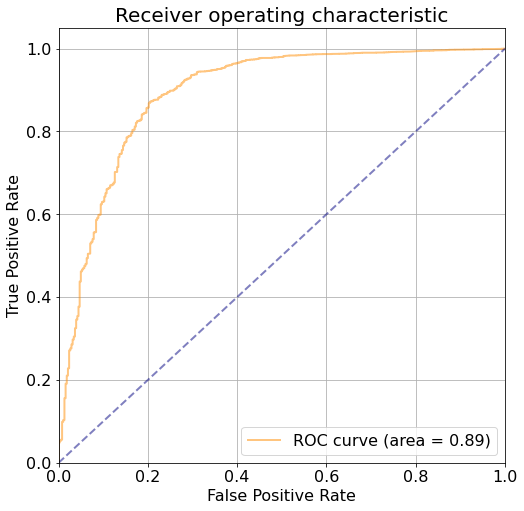

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [59]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

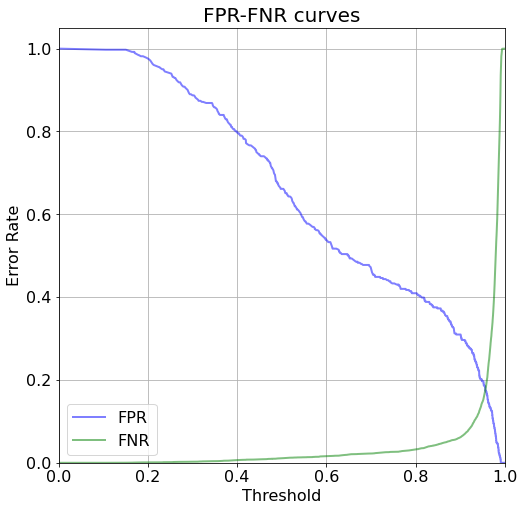

In [60]:
plt.figure(figsize=(8, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [61]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01))
print(select_threshold(model=model, data=eval_pool, FPR=0.01))

0.48689529945049076
0.9899713850692811


# Предсказания модели

In [62]:
print(model.predict_proba(data=X_validation))

TypeError: predict_proba() got an unexpected keyword argument 'data'

In [63]:
print(model.predict(data=X_validation))

[1 1 1 ... 1 1 1]


In [64]:
raw_pred = model.predict(
    data=X_validation,
    prediction_type='RawFormulaVal'
)
print(raw_pred)

[2.7374 4.2445 4.3614 ... 4.1992 3.8198 3.3681]


In [65]:
from numpy import exp

sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.9392 0.9859 0.9874 ... 0.9852 0.9785 0.9667]


# Последовательные предсказания

In [66]:
predictions_gen = model.staged_predict_proba(
    data=X_validation,
    ntree_start=0, 
    ntree_end=5, 
    eval_period=1
)
try:
    for iteration, predictions in enumerate(predictions_gen):
        print('Iteration ' + str(iteration) + ', predictions:')
        print(predictions)
except Exception:
    pass

Iteration 0, predictions:
[[0.4791 0.5209]
 [0.4791 0.5209]
 [0.4791 0.5209]
 ...
 [0.4791 0.5209]
 [0.4791 0.5209]
 [0.4791 0.5209]]
Iteration 1, predictions:
[[0.4581 0.5419]
 [0.4581 0.5419]
 [0.4581 0.5419]
 ...
 [0.4581 0.5419]
 [0.4581 0.5419]
 [0.4581 0.5419]]
Iteration 2, predictions:
[[0.4381 0.5619]
 [0.4381 0.5619]
 [0.4381 0.5619]
 ...
 [0.4381 0.5619]
 [0.4381 0.5619]
 [0.4381 0.5619]]
Iteration 3, predictions:
[[0.4185 0.5815]
 [0.4185 0.5815]
 [0.4185 0.5815]
 ...
 [0.4185 0.5815]
 [0.4185 0.5815]
 [0.4185 0.5815]]
Iteration 4, predictions:
[[0.398  0.602 ]
 [0.4044 0.5956]
 [0.4044 0.5956]
 ...
 [0.398  0.602 ]
 [0.398  0.602 ]
 [0.4044 0.5956]]


# Многоклассовая классификация

In [67]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=43,
    loss_function='MultiClass'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Важность признаков

In [68]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,MGR_ID,31.659932
1,RESOURCE,17.171955
2,ROLE_FAMILY_DESC,12.332457
3,ROLE_DEPTNAME,10.864216
4,ROLE_CODE,8.994698
5,ROLE_ROLLUP_2,8.847865
6,ROLE_ROLLUP_1,5.537394
7,ROLE_TITLE,2.484312
8,ROLE_FAMILY,2.107171


# Сохранение модели

In [69]:
my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
my_best_model.save_model('catboost_model.bin')
my_best_model.save_model('catboost_model.json', format='json')

In [70]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)

{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0


# Настройка гиперпараметров

## Скорость обучения

In [71]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1)

fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Точность

In [72]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Задание

1) Решите задачу с данными train_medium.csv, test_medium.csv с помощью CatBoost. Найдите оптимальные параметры. Сравните скорость обучения и качество с результатами xgboost.

2) Выполните пункт 1) для LightGBM. 

In [ ]:
X_train = pd.read_csv('train_small.csv')
X_test = pd.read_csv('test_small.csv')

ytrain = X_train['Disbursed']
Xtrain = X_train.copy()
del Xtrain['Disbursed']

ytest = X_test['Disbursed']
Xtest = X_test.copy()
del Xtest['Disbursed']

In [ ]:
#your code here

# Задание

Решите задачу классификации пассажиров Титаника с помощью XGBoost, CatBoost,LightGBM. Если у вас есть наработки по Титанику, используйте их. Помните о том, что CatBoost сам умеет кодировать категориальные признаки, попробуйте использовать это.

Удалось ли улучшить качество с помощью какого-либо из этих алгоритмов?

In [ ]:
import pandas as pd

df = pd.read_csv("titanic_train.csv")

#your code here